# 📈 Stock Performance Analysis – SPY ETF

Professional data analysis of the S&P 500 ETF (SPY) using Python, yfinance, and standard BI tools.

## Import Libraries

In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import plotly.graph_objects as go
from datetime import datetime

# Plotting style

plt.style.use("seaborn-v0_8-whitegrid")

## Download SPY Historical Data

In [32]:

# Download historical data for SPY, QQQ, GLD and VIX
tickers = ['SPY', 'QQQ', 'GLD', '^VIX']
start_date = "2010-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')

df_all = yf.download(tickers, start=start_date, end=end_date, group_by='ticker', auto_adjust=True)
df_all.head()





[*********************100%***********************]  4 of 4 completed


Ticker            SPY                                                     GLD  \
Price            Open       High        Low      Close     Volume        Open   
Date                                                                            
2010-01-04  85.041926  85.813862  84.391075  85.768456  118944600  109.820000   
2010-01-05  85.715478  86.033333  85.405186  85.995491  111579900  109.879997   
2010-01-06  85.912236  86.267934  85.844126  86.056030  116074400  110.709999   
2010-01-07  85.897085  86.525233  85.654909  86.419281  131091100  111.070000   
2010-01-08  86.192268  86.744736  86.018206  86.706894  126402800  111.519997   

Ticker                                                         ^VIX  \
Price             High         Low       Close    Volume       Open   
Date                                                                  
2010-01-04  110.139999  109.309998  109.800003  16224100  21.680000   
2010-01-05  110.389999  109.260002  109.699997  14213100  20.049999   
2010-01-06  111.769997  110.410004  111.510002  24981900  19.590000   
2010-01-07  111.290001  110.620003  110.820000  13609800  19.680000   
2010-01-08  111.580002  110.260002  111.370003  15894600  19.270000   

Ticker                                                    QQQ             \
Price            High        Low      Close Volume       Open       High   
Date                                                                       
2010-01-04  21.680000  20.030001  20.040001      0  40.407314  40.546860   
2010-01-05  20.129999  19.340000  19.350000      0  40.459642  40.555580   
2010-01-06  19.680000  18.770000  19.160000      0  40.468372  40.599194   
2010-01-07  19.709999  18.700001  19.059999      0  40.302668  40.354999   
2010-01-08  19.270000  18.110001  18.129999      0  40.180541  40.599178   

Ticker                                      
Price             Low      Close    Volume  
Date                                        
2010-01-04  40.354983  40.485806  62822800  
2010-01-05  40.259045  40.485806  62935600  
2010-01-06  40.180557  40.241608  96033000  
2010-01-07  40.049739  40.267780  77094100  
2010-01-08  40.058438  40.599178  88886600

## Inspect & Clean Data

In [33]:
# Extract 'Close' prices with Date as index (no reset)
close_prices = df_all.loc[:, pd.IndexSlice[:, 'Close']]
close_prices.columns = close_prices.columns.droplevel(1)  # Keep only ticker names
close_prices.index.name = 'Date'

# Confirm result
close_prices.head()

Ticker,SPY,GLD,^VIX,QQQ
Date,,,,
2010-01-04,85.768456,109.800003,20.040001,40.485806
2010-01-05,85.995491,109.699997,19.350000,40.485806
2010-01-06,86.056030,111.510002,19.160000,40.241608
2010-01-07,86.419281,110.820000,19.059999,40.267780
2010-01-08,86.706894,111.370003,18.129999,40.599178


In [34]:
# Normalize all prices to start at 100 (index-based comparison)
normalized = close_prices / close_prices.iloc[0] * 100

# Check result
normalized.head()

Ticker,SPY,GLD,^VIX,QQQ
Date,,,,
2010-01-04,100.000000,100.000000,100.000000,100.000000
2010-01-05,100.264707,99.908920,96.556884,100.000000
2010-01-06,100.335292,101.557376,95.608777,99.396831
2010-01-07,100.758817,100.928959,95.109773,99.461477
2010-01-08,101.094153,101.429872,90.469054,100.280031


In [35]:

# Check for missing values
print(close_prices.isnull().sum())

# Drop rows with any NaN values (some ETFs may not have data on all days)
close_prices.dropna(inplace=True)

# Re-normalize after cleaning
normalized = close_prices / close_prices.iloc[0] * 100

# Inspect structure
close_prices.info()
close_prices.describe()


Ticker
SPY     0
GLD     0
^VIX    0
QQQ     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3872 entries, 2010-01-04 to 2025-05-23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     3872 non-null   float64
 1   GLD     3872 non-null   float64
 2   ^VIX    3872 non-null   float64
 3   QQQ     3872 non-null   float64
dtypes: float64(4)
memory usage: 151.2 KB


/var/folders/sd/0t1nrpz904364fg8qw1f_y7w0000gn/T/ipykernel_4137/3085369196.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices.dropna(inplace=True)


Ticker,SPY,GLD,^VIX,QQQ
count,3872.000000,3872.000000,3872.000000,3872.000000
mean,256.196807,149.951547,18.464768,186.668902
std,140.674072,37.436247,6.987621,135.857622
min,78.033195,100.500000,9.140000,37.171593
25%,144.050251,120.830002,13.667500,75.210106
50%,218.240608,140.189995,16.690001,137.344162
75%,374.066284,169.610001,21.290001,293.959419
max,611.091675,315.589996,82.690002,538.716675


## Plot Closing Price & Volume

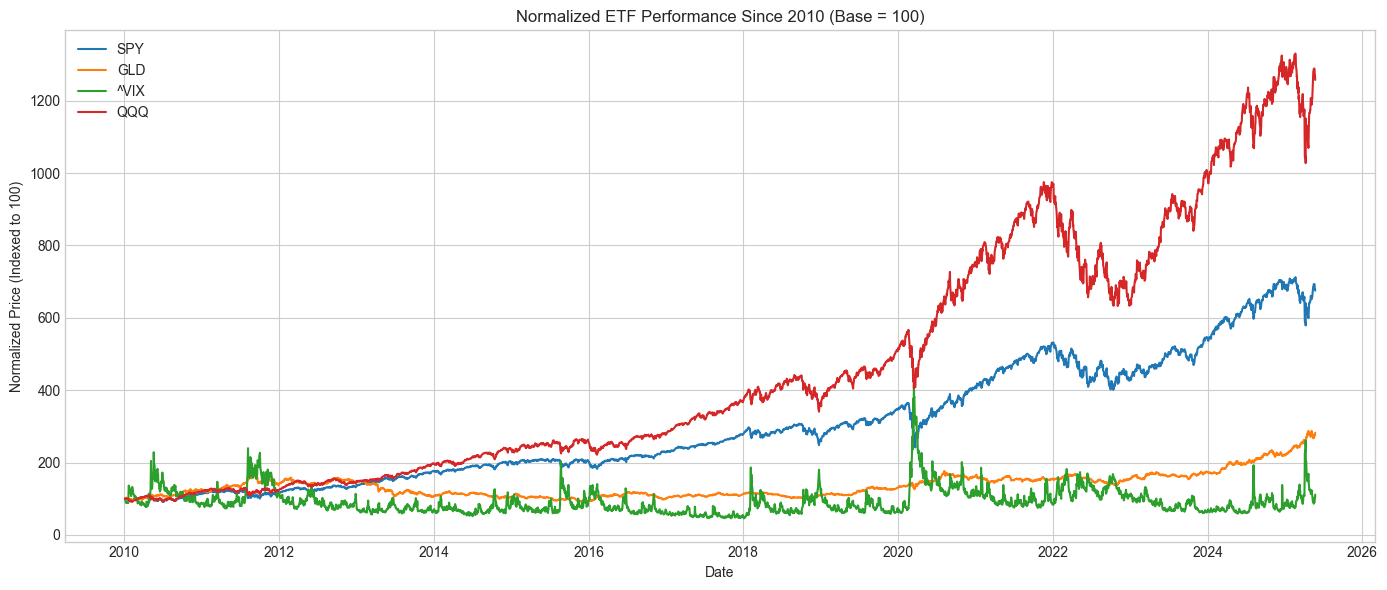

In [36]:
plt.figure(figsize=(14, 6))
for ticker in normalized.columns:
    plt.plot(normalized.index, normalized[ticker], label=ticker)

plt.title('Normalized ETF Performance Since 2010 (Base = 100)')
plt.xlabel('Date')
plt.ylabel('Normalized Price (Indexed to 100)')
plt.legend()
plt.tight_layout()
plt.savefig('img/etf_comparison_normalized.png')
plt.show()


In [37]:
# 🧮 Calculate multi-ETF KPIs
returns = close_prices.iloc[-1] / close_prices.iloc[0] - 1
volatility = close_prices.pct_change().std() * (252 ** 0.5)
latest_price = close_prices.iloc[-1]

# Combine into a DataFrame
etf_kpis = pd.DataFrame({
    'Latest Price': latest_price.round(2),
    'Total Return (%)': (returns * 100).round(2),
    'Annual Volatility (%)': (volatility * 100).round(2)
})

etf_kpis

,Latest Price,Total Return (%),Annual Volatility (%)
Ticker,,,
SPY,579.11,575.20,17.41
GLD,309.75,182.10,15.66
^VIX,22.29,11.23,132.38
QQQ,509.24,1157.82,20.85


## 📌 Multi-ETF Performance Summary

- **QQQ** massively outperformed the market, growing over **+1150%** since 2010 — driven by tech stocks like Apple, Microsoft, and Nvidia.
- **SPY** showed strong, steady growth aligned with the broader S&P 500 index.
- **GLD** delivered **+180%** growth as a stable hedge asset, useful during market stress and inflation periods.
- **VIX**, the volatility index, is not a return-generating asset — but shows sharp spikes during crises like 2020 and 2022.

> This comparative analysis helps investors understand asset behavior across market conditions and assess risk-adjusted performance.

## Calculate and Plot Moving Averages (SMA & EMA)

In [39]:
# Calculate SMA and EMA for SPY and QQQ
close_prices['SPY_SMA_20'] = close_prices['SPY'].rolling(window=20).mean()
close_prices['SPY_SMA_50'] = close_prices['SPY'].rolling(window=50).mean()
close_prices['SPY_EMA_20'] = close_prices['SPY'].ewm(span=20, adjust=False).mean()

close_prices['QQQ_SMA_20'] = close_prices['QQQ'].rolling(window=20).mean()
close_prices['QQQ_SMA_50'] = close_prices['QQQ'].rolling(window=50).mean()
close_prices['QQQ_EMA_20'] = close_prices['QQQ'].ewm(span=20, adjust=False).mean()

/var/folders/sd/0t1nrpz904364fg8qw1f_y7w0000gn/T/ipykernel_4137/3009275549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices['SPY_SMA_20'] = close_prices['SPY'].rolling(window=20).mean()
/var/folders/sd/0t1nrpz904364fg8qw1f_y7w0000gn/T/ipykernel_4137/3009275549.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices['SPY_SMA_50'] = close_prices['SPY'].rolling(window=50).mean()
/var/folders/sd/0t1nrpz904364fg8qw1f_y7w0000gn/T/ipykernel_4137/3009275549.py:4: SettingWithCopyWarning: 
A 

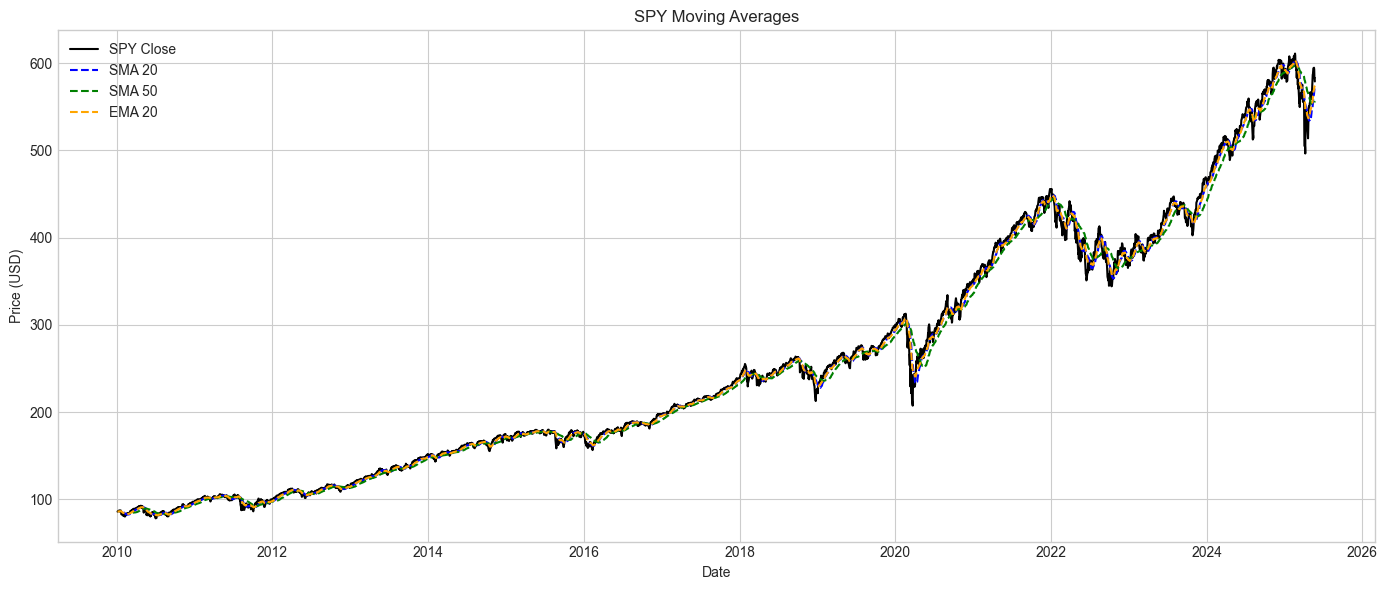

In [40]:
plt.figure(figsize=(14, 6))
plt.plot(close_prices.index, close_prices['SPY'], label='SPY Close', color='black')
plt.plot(close_prices.index, close_prices['SPY_SMA_20'], label='SMA 20', linestyle='--', color='blue')
plt.plot(close_prices.index, close_prices['SPY_SMA_50'], label='SMA 50', linestyle='--', color='green')
plt.plot(close_prices.index, close_prices['SPY_EMA_20'], label='EMA 20', linestyle='--', color='orange')
plt.title('SPY Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.savefig('img/spy_moving_averages_multi.png')
plt.show()

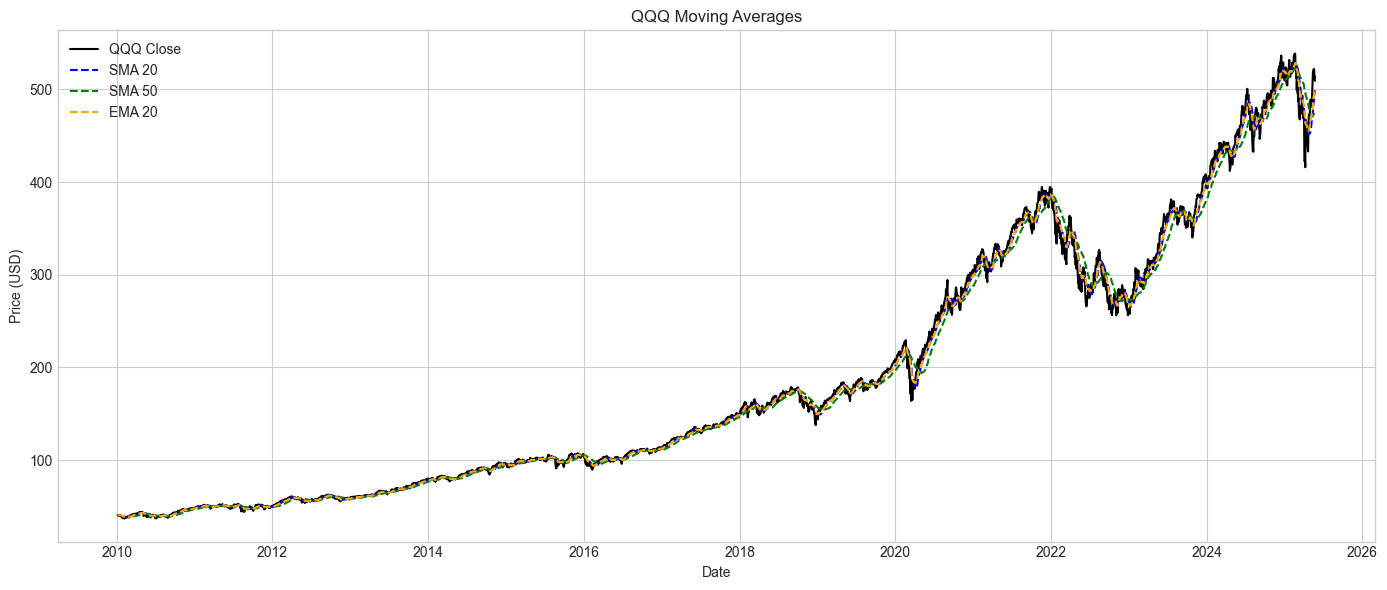

In [41]:
plt.figure(figsize=(14, 6))
plt.plot(close_prices.index, close_prices['QQQ'], label='QQQ Close', color='black')
plt.plot(close_prices.index, close_prices['QQQ_SMA_20'], label='SMA 20', linestyle='--', color='blue')
plt.plot(close_prices.index, close_prices['QQQ_SMA_50'], label='SMA 50', linestyle='--', color='green')
plt.plot(close_prices.index, close_prices['QQQ_EMA_20'], label='EMA 20', linestyle='--', color='orange')
plt.title('QQQ Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.savefig('img/qqq_moving_averages.png')
plt.show()

In [42]:
# Calculate GLD Moving Averages
close_prices['GLD_SMA_20'] = close_prices['GLD'].rolling(window=20).mean()
close_prices['GLD_SMA_50'] = close_prices['GLD'].rolling(window=50).mean()
close_prices['GLD_EMA_20'] = close_prices['GLD'].ewm(span=20, adjust=False).mean()

/var/folders/sd/0t1nrpz904364fg8qw1f_y7w0000gn/T/ipykernel_4137/2483405661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices['GLD_SMA_20'] = close_prices['GLD'].rolling(window=20).mean()
/var/folders/sd/0t1nrpz904364fg8qw1f_y7w0000gn/T/ipykernel_4137/2483405661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices['GLD_SMA_50'] = close_prices['GLD'].rolling(window=50).mean()
/var/folders/sd/0t1nrpz904364fg8qw1f_y7w0000gn/T/ipykernel_4137/2483405661.py:4: SettingWithCopyWarning: 
A 

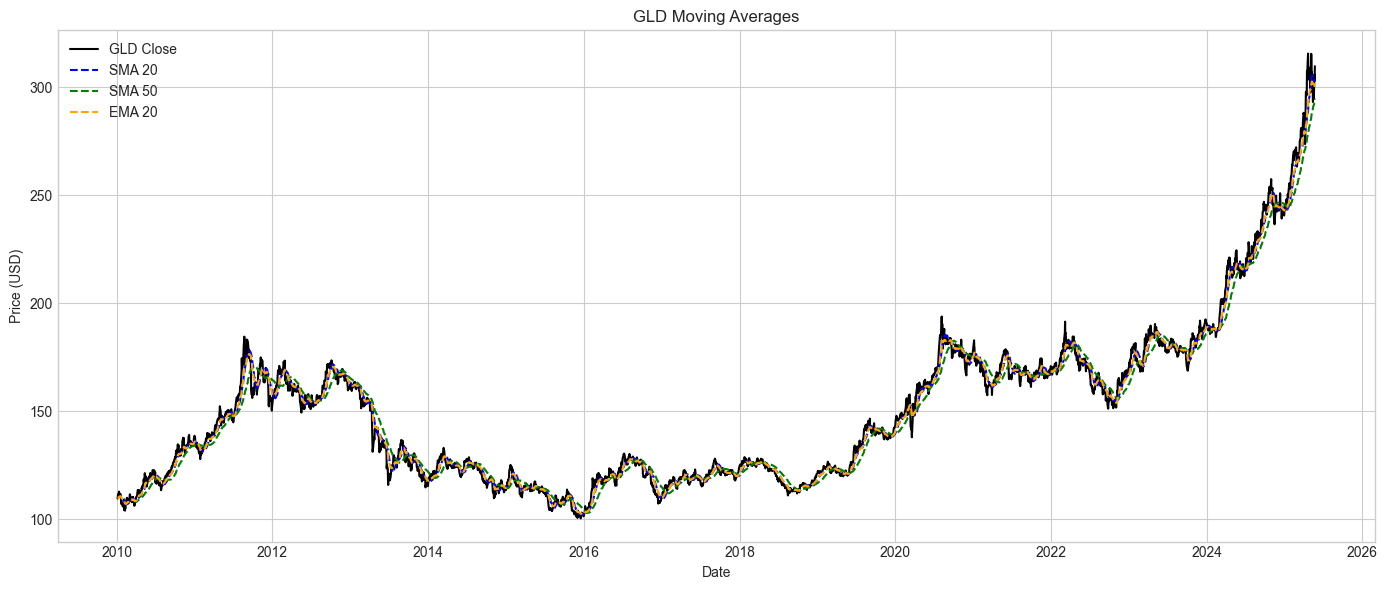

In [43]:
plt.figure(figsize=(14, 6))
plt.plot(close_prices.index, close_prices['GLD'], label='GLD Close', color='black')
plt.plot(close_prices.index, close_prices['GLD_SMA_20'], label='SMA 20', linestyle='--', color='blue')
plt.plot(close_prices.index, close_prices['GLD_SMA_50'], label='SMA 50', linestyle='--', color='green')
plt.plot(close_prices.index, close_prices['GLD_EMA_20'], label='EMA 20', linestyle='--', color='orange')
plt.title('GLD Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.savefig('img/gld_moving_averages.png')
plt.show()

## Build a KPI Summary Block

/var/folders/sd/0t1nrpz904364fg8qw1f_y7w0000gn/T/ipykernel_4137/3376234221.py:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/sd/0t1nrpz904364fg8qw1f_y7w0000gn/T/ipykernel_4137/3376234221.py:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.savefig('img/etf_kpi_summary.png')
/Users/agustinjaureguiberry/Documents/Portafolio_Project/stock_analysis/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


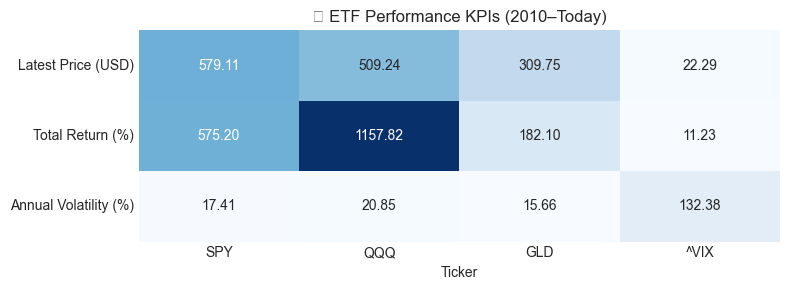

In [45]:
# Clean KPI table (only base tickers)
base_tickers = ['SPY', 'QQQ', 'GLD', '^VIX']

returns = close_prices[base_tickers].iloc[-1] / close_prices[base_tickers].iloc[0] - 1
volatility = close_prices[base_tickers].pct_change().std() * (252 ** 0.5)
latest = close_prices[base_tickers].iloc[-1]

etf_kpis = pd.DataFrame({
    'Latest Price (USD)': latest.round(2),
    'Total Return (%)': (returns * 100).round(2),
    'Annual Volatility (%)': (volatility * 100).round(2)
})

# Plot heatmap
plt.figure(figsize=(8, 3))
sns.heatmap(etf_kpis.T, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("📊 ETF Performance KPIs (2010–Today)")
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('img/etf_kpi_summary.png')
plt.show()

## 📌 Key Insights

- **QQQ** significantly outperformed all other ETFs with a **+1157% return**, driven by the explosive growth of tech stocks since 2010.
- **SPY**, representing the broader S&P 500, delivered a solid **+575% return**, making it a reliable benchmark for long-term equity investing.
- **GLD** showed a consistent, defensive performance of **+182%**, with lower volatility, highlighting its role as a hedge in uncertain markets.
- **^VIX**, the volatility index, exhibited extreme annual volatility (**132%**) and modest growth. It is not an investment vehicle but a crucial **market fear indicator**.
- Moving averages (SMA and EMA) helped visualize market phases, with QQQ and SPY showing long-term bullish trends, and GLD highlighting cyclical movements aligned with macroeconomic stress.

> This multi-asset analysis provides valuable insights into portfolio diversification, risk exposure, and market behavior across different asset classes.